Step1: Import Relevant Libraries and Dataset

In [ ]:
# Data Preprocessing
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the CSV file into a DataFrame
deliveries_data = pd.read_csv('deliveries.csv')
matches_data=pd.read_csv('matches.csv')

Step2: Understanding The Dataset

In [ ]:
# how many rows and cols are present in deliveries data set? ==> shape
deliveries_data.shape
print("Number of rows: ", deliveries_data.shape[0])
print("Number of columns: ", deliveries_data.shape[1])

deliveries_data.shape

Number of rows:  260920
Number of columns:  17


(260920, 17)

In [ ]:
# how many rows and cols are present in matches data set? ==> shape
matches_data.shape
print("Number of rows: ", matches_data.shape[0])
print("Number of columns: ", matches_data.shape[1])

matches_data.shape

Number of rows:  1095
Number of columns:  20


(1095, 20)

In [ ]:
#what are the names of col?
deliveries_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
matches_data.columns

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
# check out the first few and last few rows.
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
deliveries_data.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
matches_data.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
matches_data.tail()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [ ]:
#merging two datasets
main_data = pd.merge(deliveries_data, matches_data, on='match_id', how='left')

In [ ]:
# what are the dtypes of the columns? Identify the numerical and categorical columns
main_data.dtypes

,0
match_id,int64
inning,int64
batting_team,object
bowling_team,object
over,int64
ball,int64
batter,object
bowler,object
non_striker,object
batsman_runs,int64


In [ ]:
# how many rows and cols are present? ==> shape
main_data.shape
print("Number of rows: ", main_data.shape[0])
print("Number of columns: ", main_data.shape[1])

Number of rows:  260920
Number of columns:  36


In [ ]:
#what is the genaral info regarding the dataset
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       14125 non-null   object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  12950 non-null   object 
 15  dismissal_kind    12950 non-null   object 
 16  fielder           93

In [ ]:
# Download dataset
#main_data.to_csv('main_data.csv', index=False)

In [ ]:
#from google.colab import files
#files.download('main_data.csv')

In [ ]:
main_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season', 'city', 'date', 'match_type',
       'player_of_match', 'venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'target_runs',
       'target_overs', 'super_over', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
main_data.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [ ]:
main_data.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [ ]:
#what are the statistics of the numeric columns
main_data.describe() #gives the statitical explaination of the numercal columnns present in the dataset

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,result_margin,target_runs,target_overs
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,256796.000000,260611.000000,260611.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632,17.279451,167.290406,19.846742
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184,21.600307,32.165944,1.224266
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,5.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,148.000000,20.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,8.000000,167.000000,20.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,20.000000,188.000000,20.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000,146.000000,288.000000,20.000000


In [ ]:
#what are the statistics of the catrgorical columns
main_data.describe(include=['object'])

,batting_team,bowling_team,batter,bowler,non_striker,extras_type,player_dismissed,dismissal_kind,fielder,season,...,team1,team2,toss_winner,toss_decision,winner,result,super_over,method,umpire1,umpire2
count,260920,260920,260920,260920,260920,14125,12950,12950,9354,260920,...,260920,260920,260920,260920,260430,260920,260920,3646,260920,260920
unique,19,19,673,530,663,5,629,10,607,17,...,19,19,19,2,19,4,2,1,62,62
top,Mumbai Indians,Mumbai Indians,V Kohli,R Ashwin,V Kohli,wides,RG Sharma,caught,MS Dhoni,2013,...,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,N,D/L,AK Chaudhary,S Ravi
freq,31437,31505,6236,4679,6067,8380,223,8063,220,18177,...,31649,33330,34357,167471,34629,135296,257286,3646,27353,19983


In [ ]:
main_data.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


# Handling missing values
* treat missing values

* remove rows/col with missing value (>50% is missing)

Fill the missing values with a particular value:

* mean (numeric col)

* median (to fill numeric column which are right skewed)

* mode (to fill categorical column)

In [ ]:
# Columns with missing values

# extras_type- 246795/260920  ----->drop---object
# player_dismissed-247970/260920 ---->drop  --object
# dismissal_kind-247970/260920---->drop --object
# fielder -251566/260920----->drop --object
# city-12397/260920 --object
# player_of_match-490/260920 ---object
# winner- 490/260920 --object
# result_margin -4124/260920 ---float64
# target_runs- 309/260920 --float64
# target_overs - 309/260920 --float64
# method -257274/260920----drop --object


In [ ]:
# extras_type- 246795/260920  ----->drop---remove rows/col with missing value (>50% is missing)
main_data.drop('extras_type', axis=1, inplace=True)


In [ ]:
# player_dismissed-247970/260920 ---->drop  --remove rows/col with missing value (>50% is missing)
main_data.drop('player_dismissed', axis=1, inplace=True)


In [ ]:
# dismissal_kind-247970/260920---->drop --remove rows/col with missing value (>50% is missing)
main_data.drop('dismissal_kind', axis=1, inplace=True)

In [ ]:
# fielder -251566/260920----->drop --remove rows/col with missing value (>50% is missing)
main_data.drop('fielder', axis=1, inplace=True)

In [ ]:
# method -257274/260920----drop --remove rows/col with missing value (>50% is missing)
main_data.drop('method', axis=1, inplace=True)

In [ ]:
# city-12397/260920 --object----mode (to fill categorical column)
main_data.fillna({'city':main_data['city'].mode()[0]},inplace=True)

In [ ]:
# player_of_match-490/260920 ---object-----mode (to fill categorical column)
main_data.fillna({'player_of_match':main_data['player_of_match'].mode()[0]},inplace=True)

In [ ]:
# winner- 490/260920 --object-----mode (to fill categorical column)
main_data.fillna({'winner':main_data['winner'].mode()[0]},inplace=True)

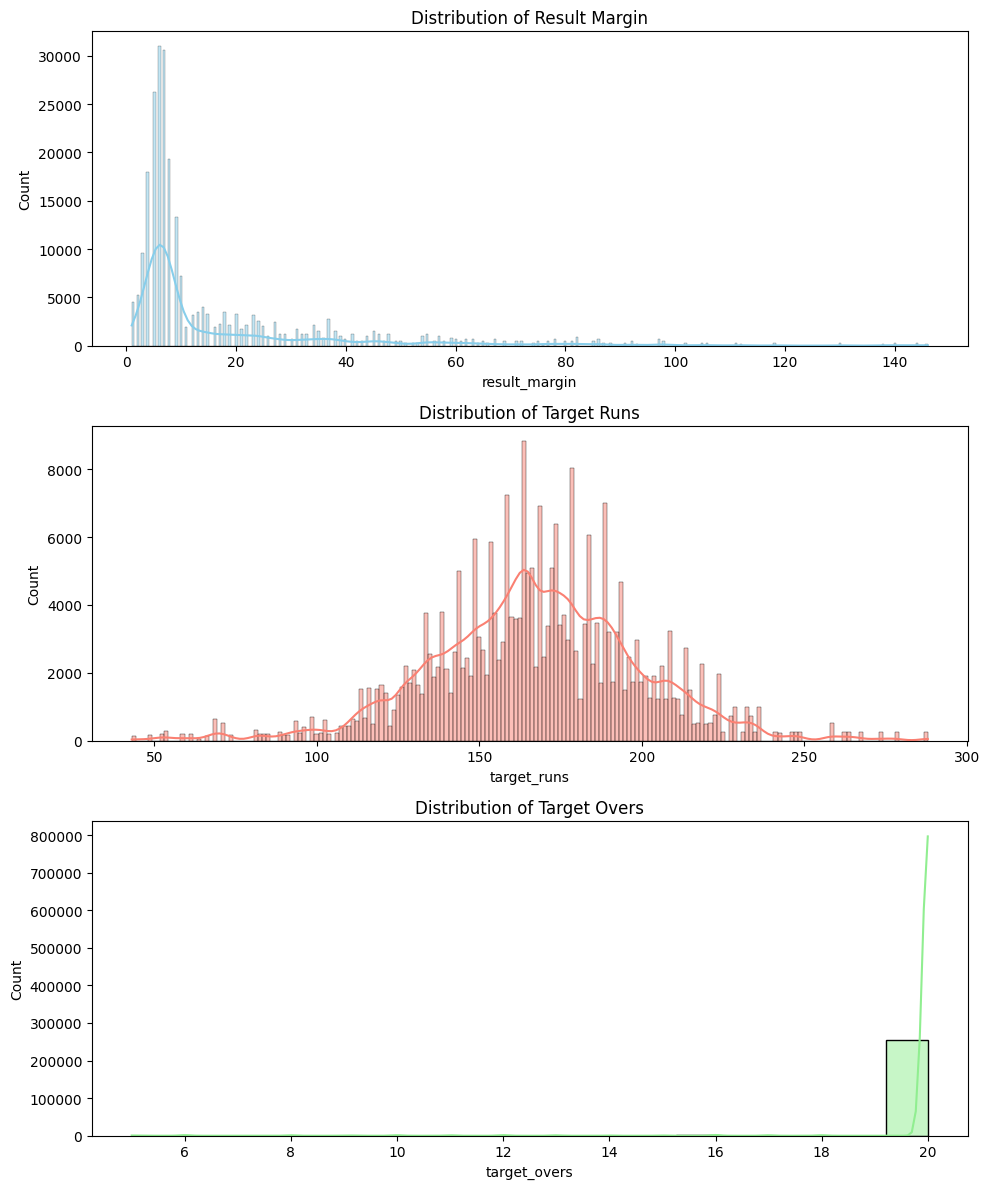

In [ ]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot distribution of result_margin
sns.histplot(main_data['result_margin'].dropna(), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Result Margin')

# Plot distribution of target_runs
sns.histplot(main_data['target_runs'].dropna(), kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Target Runs')


# Plot distribution of target_overs
sns.histplot(main_data['target_overs'].dropna(), kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Target Overs')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# result_margin -4124/260920 ---float64-- (numeric col)---skewed---median
main_data.fillna({'result_margin': main_data['result_margin'].median()},inplace=True)

In [ ]:
# target_runs- 309/260920 --float64-----mean (numeric col)---uniformily distribution
main_data.fillna({'target_runs': main_data['target_runs'].mean()},inplace=True)

In [ ]:
# target_overs - 309/260920 --float64---(numeric col)---skewed---median
main_data.fillna({'target_overs': main_data['target_overs'].median()},inplace=True)

In [ ]:
main_data.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
main_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'is_wicket', 'season', 'city', 'date', 'match_type',
       'player_of_match', 'venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'target_runs',
       'target_overs', 'super_over', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
main_data.shape

(260920, 31)

Step 3: Data Visualization

Univariate Analysis
* Analysing one column at a a time
* Numerical column : histogram
* Categorical column: countplot

In [ ]:
# histograms of all numerical columns
num_col=main_data.select_dtypes(include=['int64','float64']).columns

In [ ]:
num_col

Index(['match_id', 'inning', 'over', 'ball', 'batsman_runs', 'extra_runs',
       'total_runs', 'is_wicket', 'result_margin', 'target_runs',
       'target_overs'],
      dtype='object')

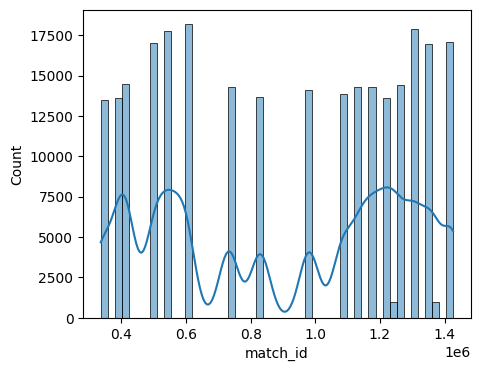

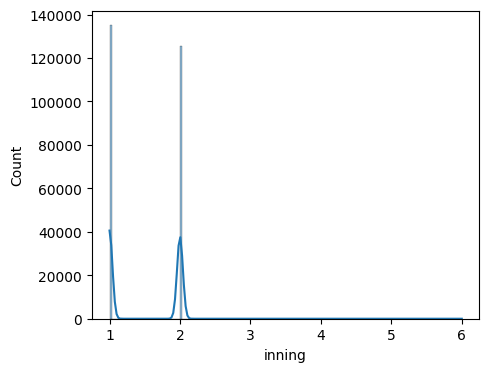

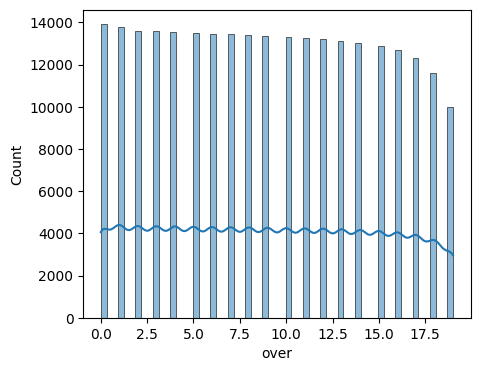

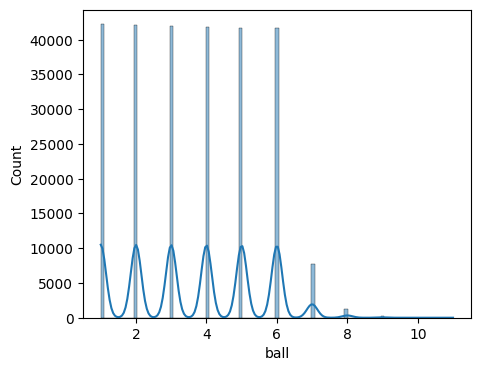

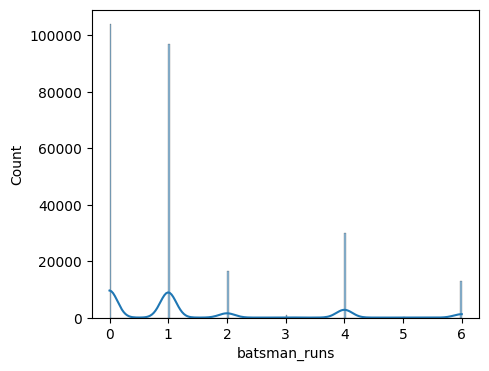

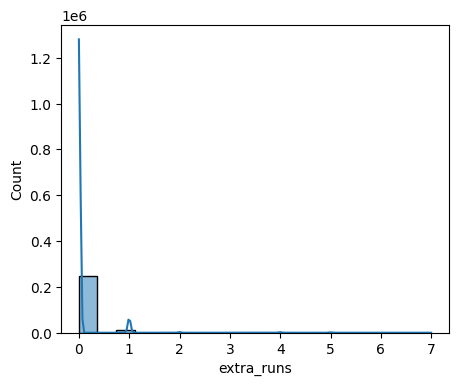

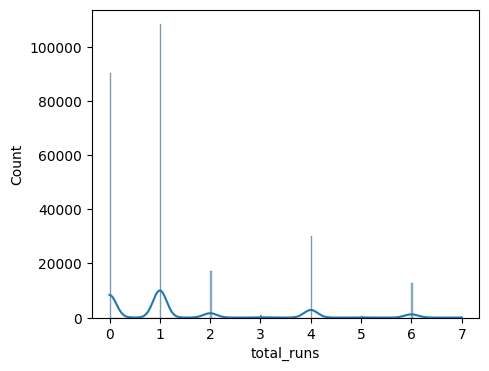

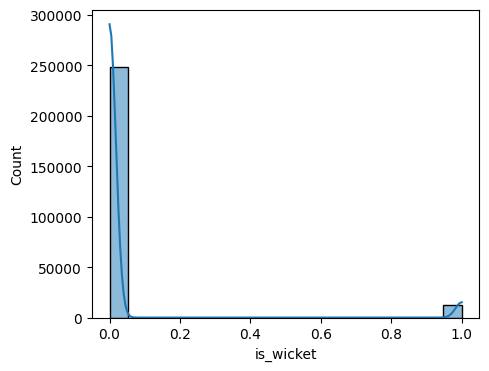

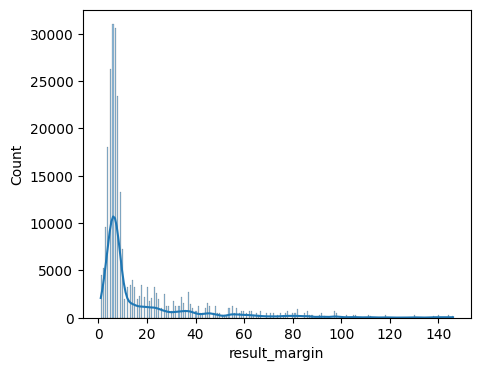

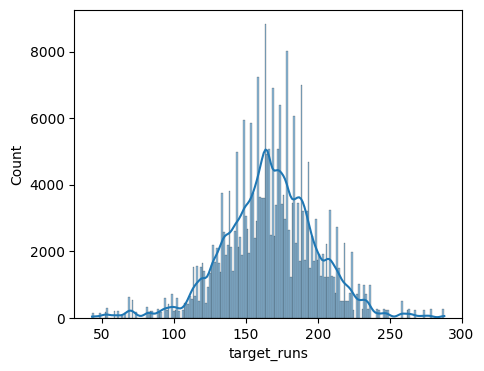

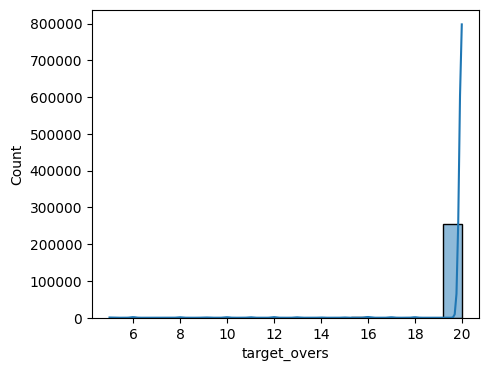

In [ ]:
#Univariate analysis
#histogram for all numerical columns

num_cols = main_data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(5, 4))
    sns.histplot(main_data[col], kde=True)

Categorical Columns: ['batting_team', 'bowling_team', 'batter', 'bowler', 'non_striker', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'super_over', 'umpire1', 'umpire2']


<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


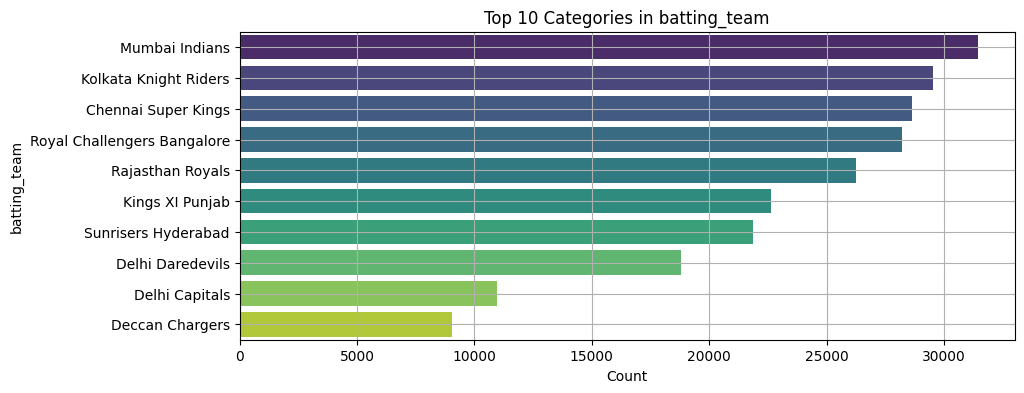

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


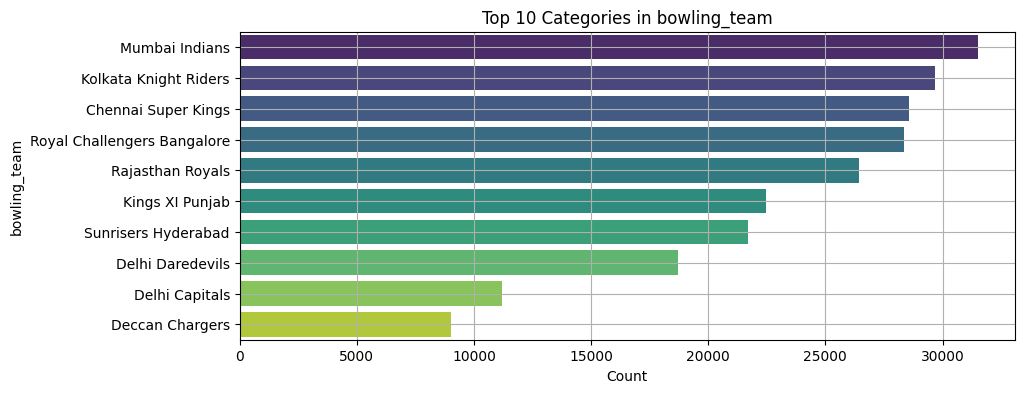

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


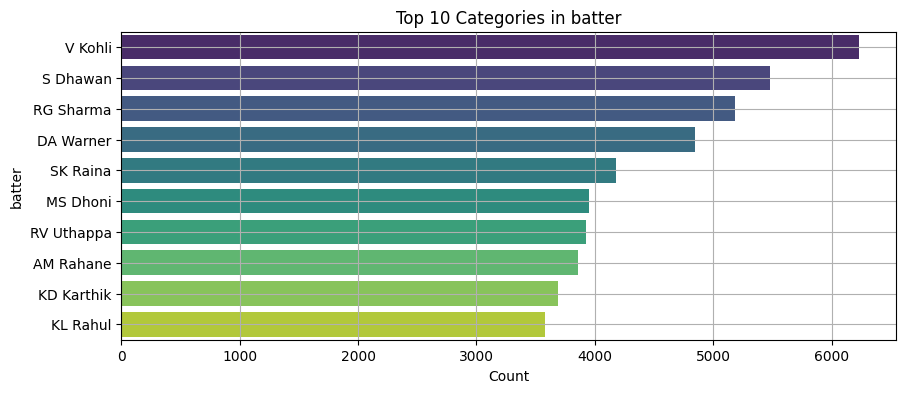

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


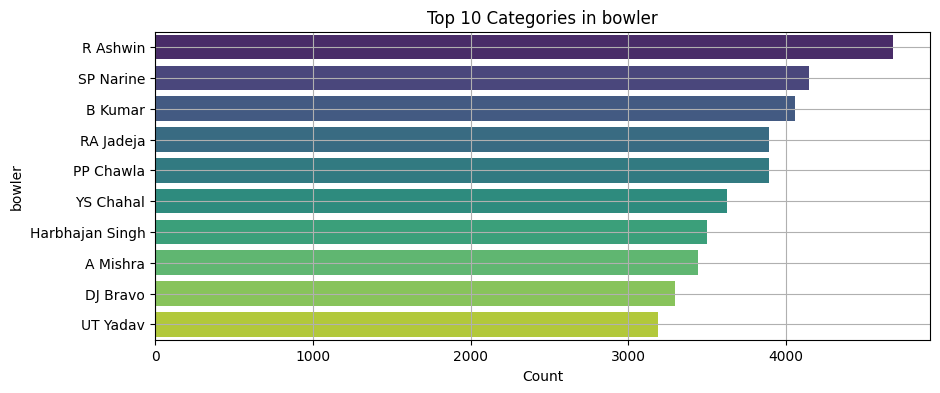

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


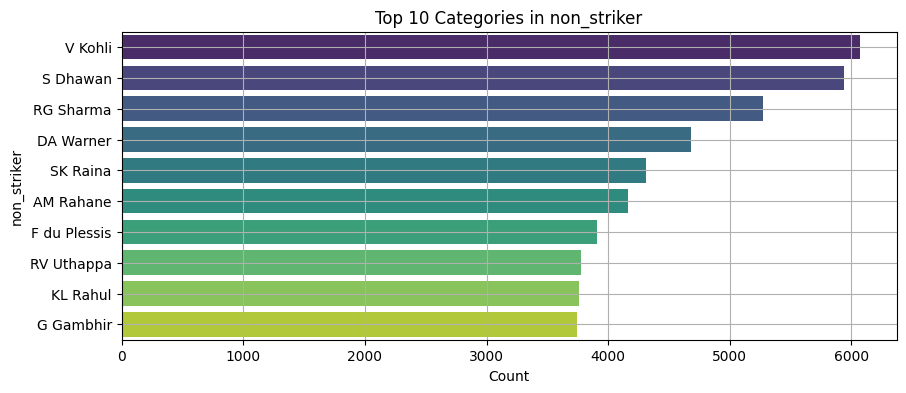

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


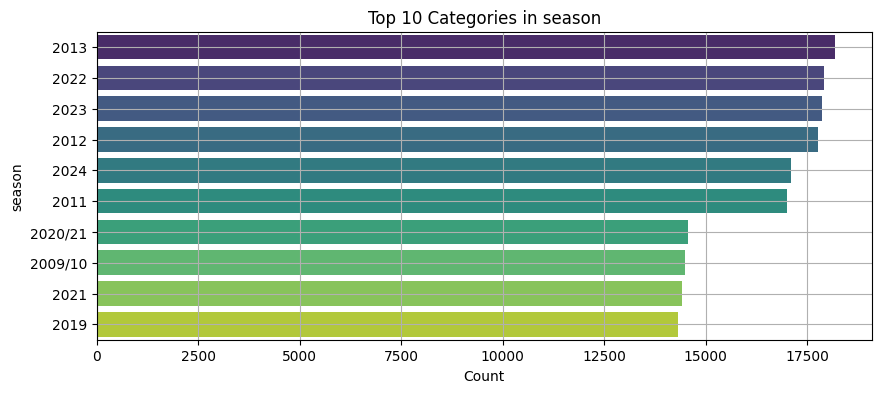

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


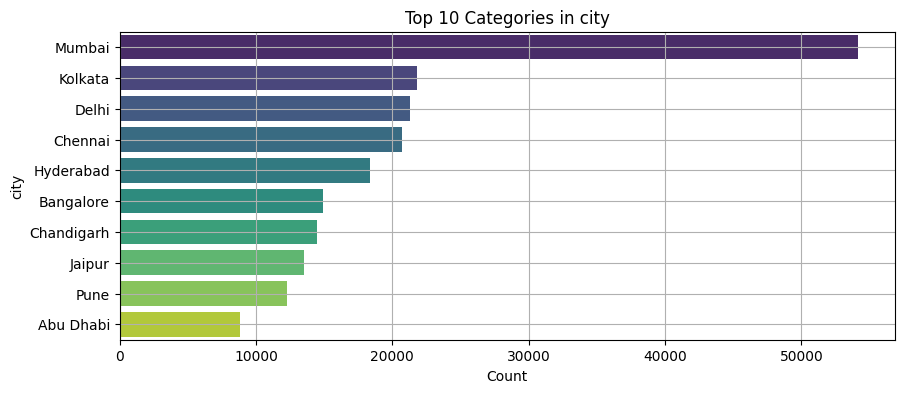

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


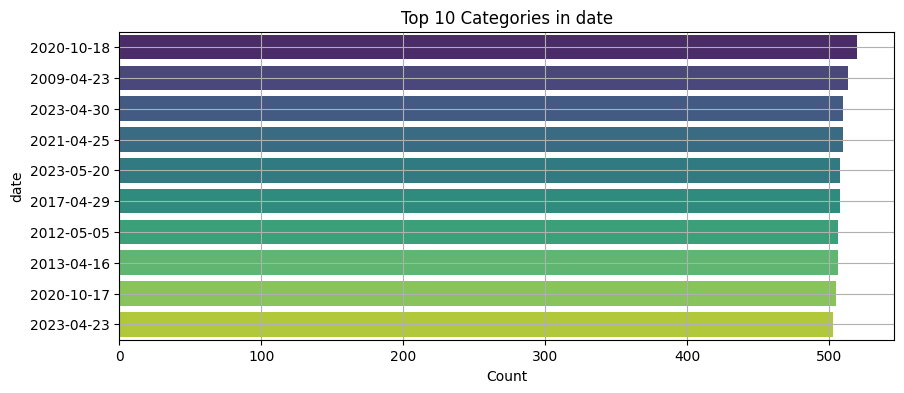

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


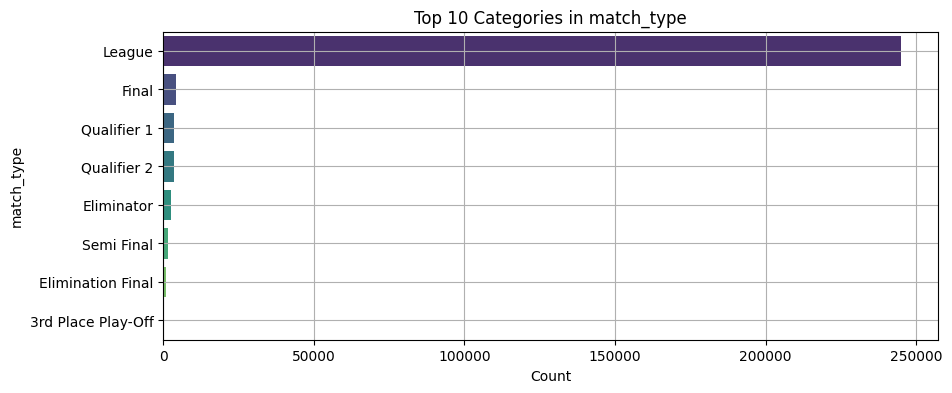

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


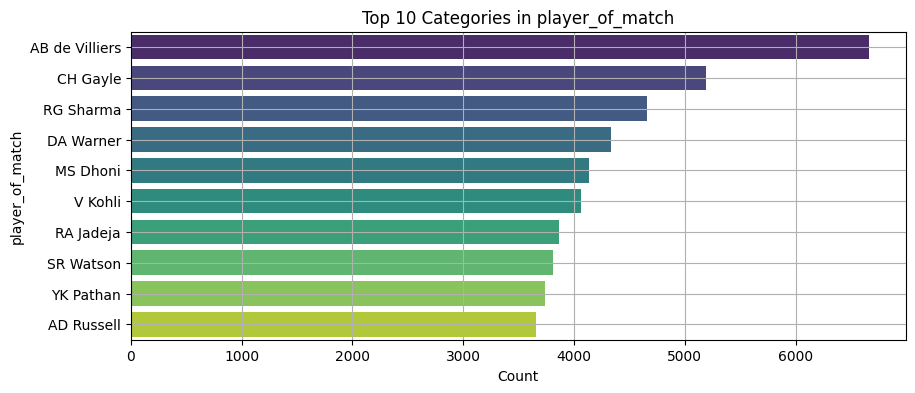

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


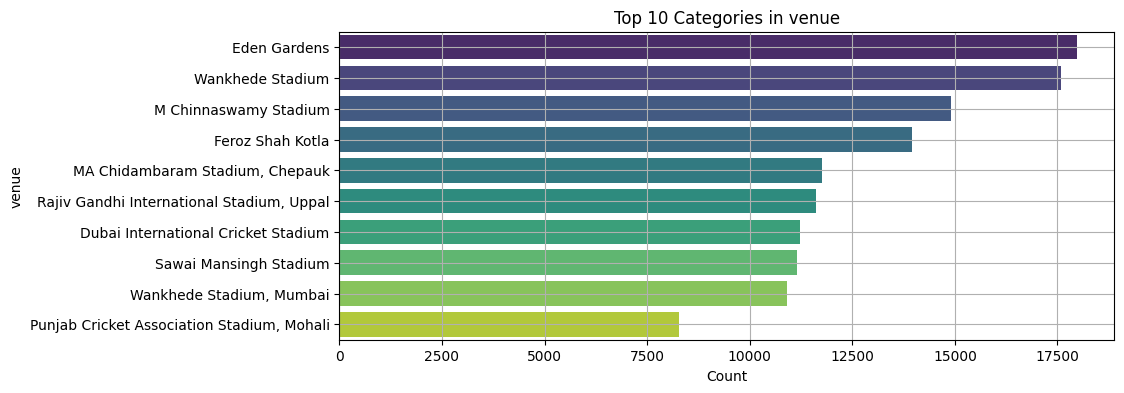

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


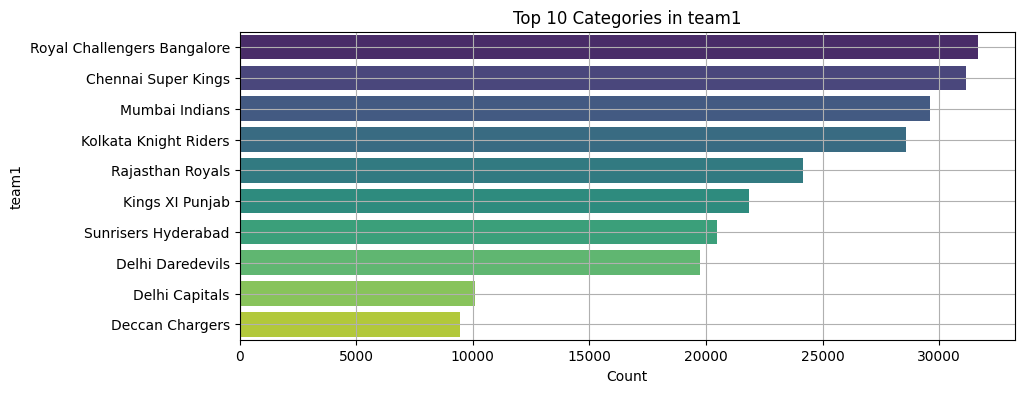

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


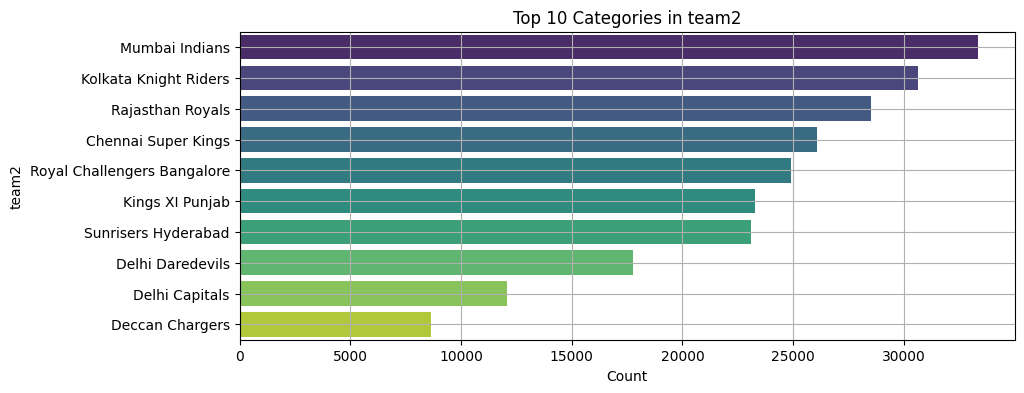

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


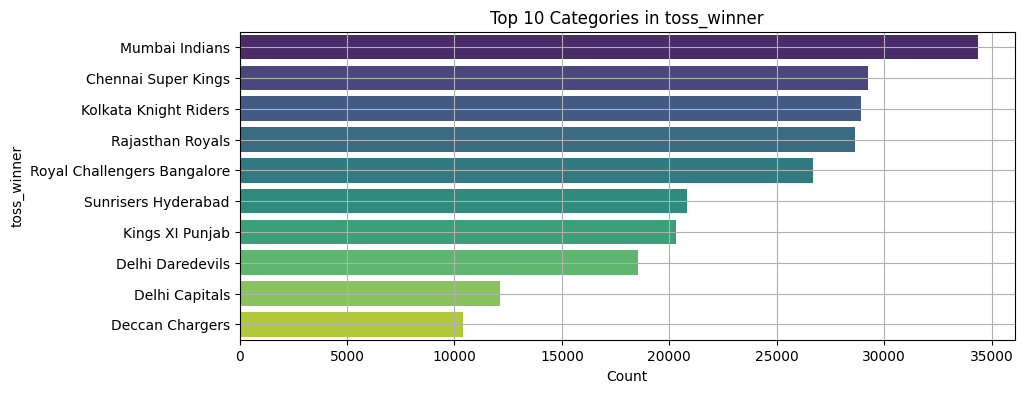

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


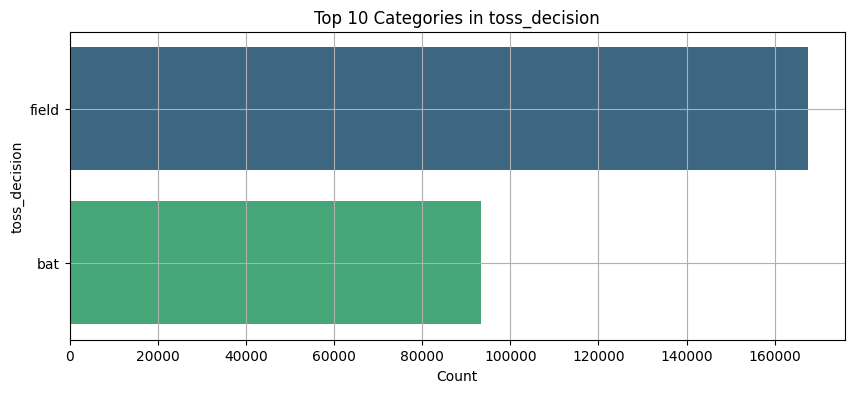

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


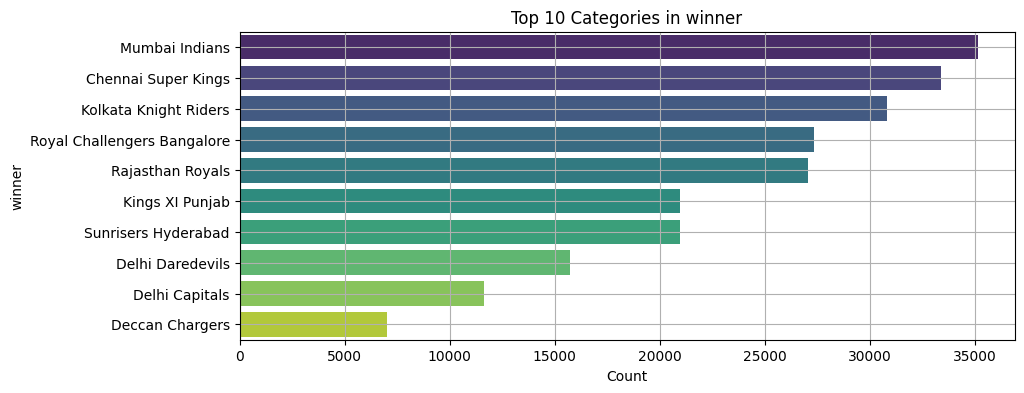

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


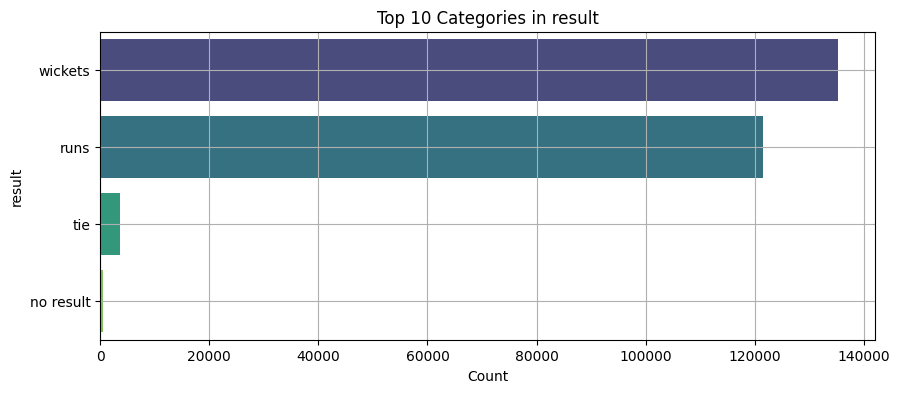

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


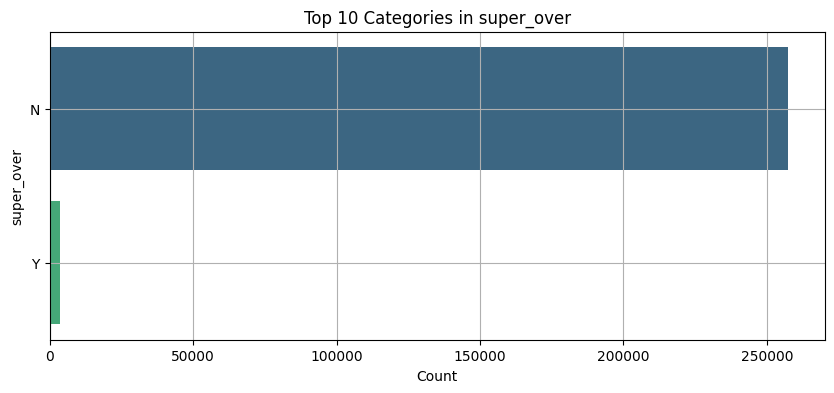

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


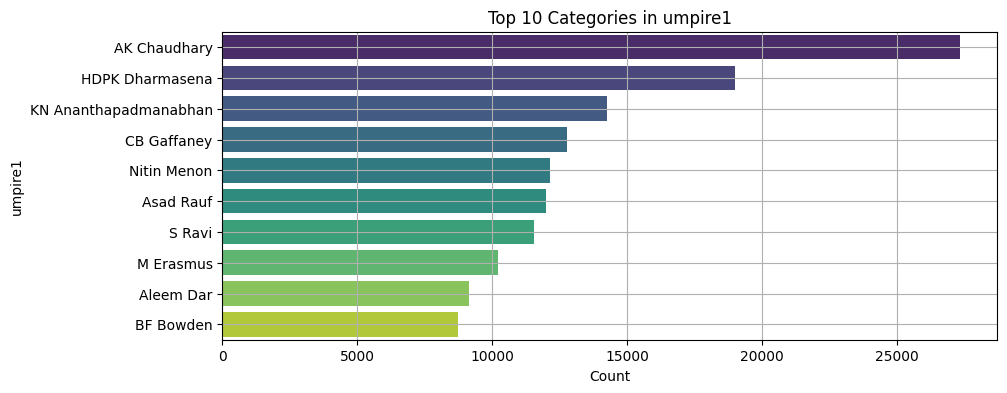

<ipython-input-43-eba5f351af80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


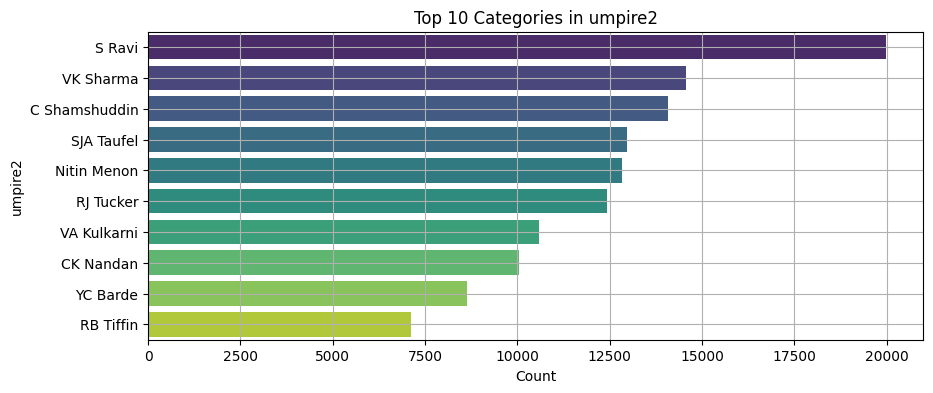

In [ ]:
# Plot countplot for each categorical column (only top 10 categories for readability)
categorical_cols = main_data.select_dtypes(include='object').columns
print("Categorical Columns:", list(categorical_cols))
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    top_categories = main_data[col].value_counts().nlargest(10)
    sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
    plt.title(f'Top 10 Categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

In [ ]:
# Convert 'over' and 'ball' to a single count for easier calculation
main_data['ball_count'] = main_data['over'] * 6 + main_data['ball']

In [ ]:
main_data.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,ball_count
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,1
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,3


In [ ]:
# Sorting the data to ensure the rolling operation respects the match and inning progression
main_data.sort_values(by=['match_id', 'inning', 'ball_count'], inplace=True)


In [ ]:
main_data.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,ball_count
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,1
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,3


In [ ]:
# Reset the index to ensure proper rolling calculations
main_data.reset_index(drop=True, inplace=True)

In [ ]:
main_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,ball_count
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,1
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2


In [ ]:
# Calculate rolling totals for both runs and wickets, using the last 30 balls
main_data['score_last_30_balls'] = main_data.groupby(['match_id', 'inning'])['total_runs'].transform(
    lambda x: x.rolling(window=30, min_periods=1).sum())


In [ ]:
main_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,ball_count,score_last_30_balls
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,1,1.0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2,1.0


In [ ]:
main_data['wickets_last_30_balls'] = main_data.groupby(['match_id', 'inning'])['is_wicket'].transform(
    lambda x: x.rolling(window=30, min_periods=1).sum())

In [ ]:
main_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,ball_count,score_last_30_balls,wickets_last_30_balls
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,1,1.0,0.0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2,1.0,0.0


In [ ]:
# Calculate the cumulative score
main_data['cumulative_score'] = main_data.groupby(['match_id', 'inning'])['total_runs'].cumsum()


In [ ]:
main_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,ball_count,score_last_30_balls,wickets_last_30_balls,cumulative_score
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,1,1.0,0.0,1
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2,1.0,0.0,1


In [ ]:
# Adjust the first 5 overs to just cumulative sum up to that ball
mask = main_data['over'] < 5
main_data.loc[mask, 'score_last_30_balls'] = main_data.loc[mask].groupby(['match_id', 'inning'])['total_runs'].cumsum()
main_data.loc[mask, 'wickets_last_30_balls'] = main_data.loc[mask].groupby(['match_id', 'inning'])['is_wicket'].cumsum()

In [ ]:
main_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,ball_count,score_last_30_balls,wickets_last_30_balls,cumulative_score
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,1,1.0,0.0,1
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2,1.0,0.0,1


In [ ]:
# Calculate cumulative wickets
main_data['cumulative_wickets'] = main_data.groupby(['match_id', 'inning'])['is_wicket'].cumsum()


In [ ]:
main_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,target_runs,target_overs,super_over,umpire1,umpire2,ball_count,score_last_30_balls,wickets_last_30_balls,cumulative_score,cumulative_wickets
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,223.0,20.0,N,Asad Rauf,RE Koertzen,1,1.0,0.0,1,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,223.0,20.0,N,Asad Rauf,RE Koertzen,2,1.0,0.0,1,0


In [ ]:
# Calculate the cumulative total score for each ball in the innings
main_data['cumulative_score'] = main_data.groupby(['match_id', 'inning'])['total_runs'].cumsum()

In [ ]:
main_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,target_runs,target_overs,super_over,umpire1,umpire2,ball_count,score_last_30_balls,wickets_last_30_balls,cumulative_score,cumulative_wickets
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,223.0,20.0,N,Asad Rauf,RE Koertzen,1,1.0,0.0,1,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,223.0,20.0,N,Asad Rauf,RE Koertzen,2,1.0,0.0,1,0


In [ ]:
# Calculate the final total score for each innings and merge this as 'total_score' for each delivery
final_scores = main_data.groupby(['match_id', 'inning'])['cumulative_score'].max().reset_index()
final_scores.rename(columns={'cumulative_score': 'total_score'}, inplace=True)
main_data = pd.merge(main_data, final_scores, on=['match_id', 'inning'], how='left')

In [ ]:
main_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,target_overs,super_over,umpire1,umpire2,ball_count,score_last_30_balls,wickets_last_30_balls,cumulative_score,cumulative_wickets,total_score
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,20.0,N,Asad Rauf,RE Koertzen,1,1.0,0.0,1,0,222
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,20.0,N,Asad Rauf,RE Koertzen,2,1.0,0.0,1,0,222


In [ ]:
main_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'is_wicket', 'season', 'city', 'date', 'match_type',
       'player_of_match', 'venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'target_runs',
       'target_overs', 'super_over', 'umpire1', 'umpire2', 'ball_count',
       'score_last_30_balls', 'wickets_last_30_balls', 'cumulative_score',
       'cumulative_wickets', 'total_score'],
      dtype='object')

In [ ]:
main_data.shape

(260920, 37)

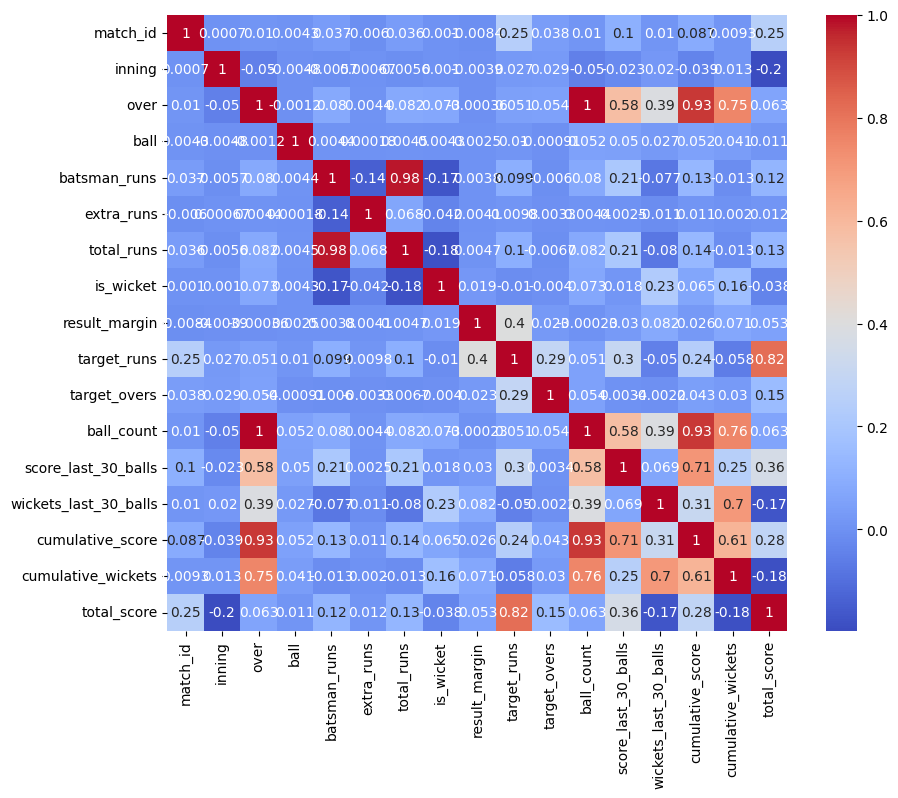

In [ ]:
#Extract correlation matrix.heatmap

num_col = main_data.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = main_data[num_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Removing Unwanted Columns from the dataframe
columns= ['is_wicket','non_striker','bowler','batter','match_id','batsman_runs', 'extra_runs',
'is_wicket','season','toss_winner','result','super_over', 'umpire1', 'umpire2',
'target_overs','venue','player_of_match','team1', 'team2','result_margin', 'target_runs','total_runs','match_type','ball_count','winner','ball']
main_data.drop(columns=columns, axis=1, inplace=True)

In [ ]:
main_data.shape

(260920, 12)

In [ ]:
main_data.columns

Index(['inning', 'batting_team', 'bowling_team', 'over', 'city', 'date',
       'toss_decision', 'score_last_30_balls', 'wickets_last_30_balls',
       'cumulative_score', 'cumulative_wickets', 'total_score'],
      dtype='object')

In [ ]:
main_data.dropna(inplace=True)

In [ ]:
main_data['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [ ]:
# Punjab Kings is the new name of Kings XI Punjab & Delhi Capitals is the new name of Delhi Daredevils

main_data['batting_team'] = main_data['batting_team'].replace({
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals'
})

In [ ]:
# Updating in the bowling team column

main_data['bowling_team'] = main_data['bowling_team'].replace({
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals'
})

In [ ]:
#Updating the Bangalore to Bengaluru
main_data['city'] = main_data['city'].replace({
    'Bangalore': 'Bengaluru'
})

In [ ]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Punjab Kings', 'Royal Challengers Bangalore',
                    'Delhi Capitals', 'Sunrisers Hyderabad','Gujarat Titans','Lucknow Super Giants']

In [ ]:
main_data['city'].unique()

array(['Bengaluru', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Rajkot', 'Kanpur', 'Sharjah', 'Dubai', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [ ]:
consistent_cities= ['Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai',  'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
        'Rajkot', 'Kanpur', 'Bengaluru',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali']

In [ ]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
main_data['date'] = main_data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   inning                 260920 non-null  int64         
 1   batting_team           260920 non-null  object        
 2   bowling_team           260920 non-null  object        
 3   over                   260920 non-null  int64         
 4   city                   260920 non-null  object        
 5   date                   260920 non-null  datetime64[ns]
 6   toss_decision          260920 non-null  object        
 7   score_last_30_balls    260920 non-null  float64       
 8   wickets_last_30_balls  260920 non-null  float64       
 9   cumulative_score       260920 non-null  int64         
 10  cumulative_wickets     260920 non-null  int64         
 11  total_score            260920 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), 

In [ ]:
## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

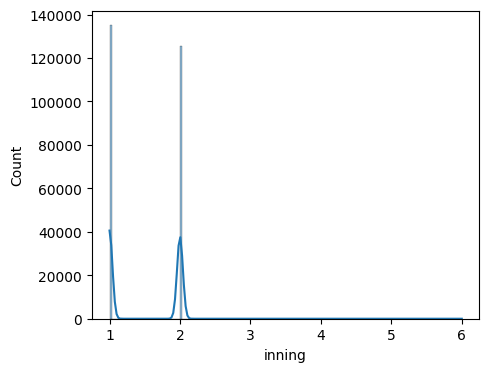

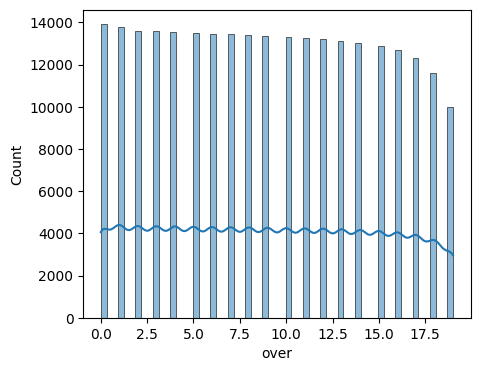

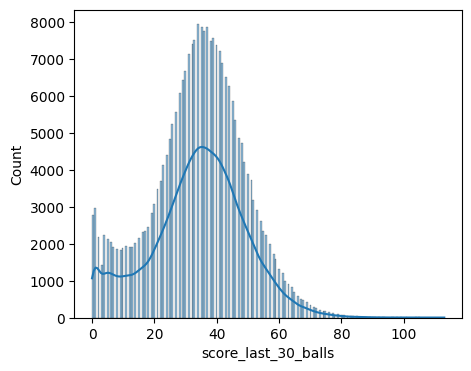

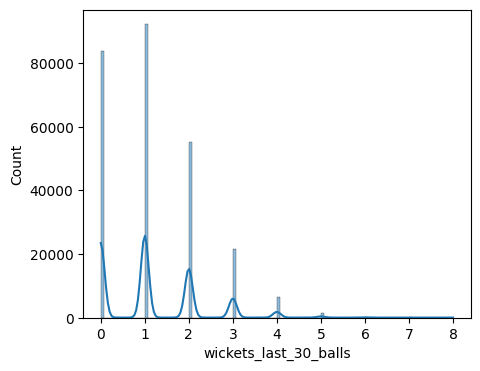

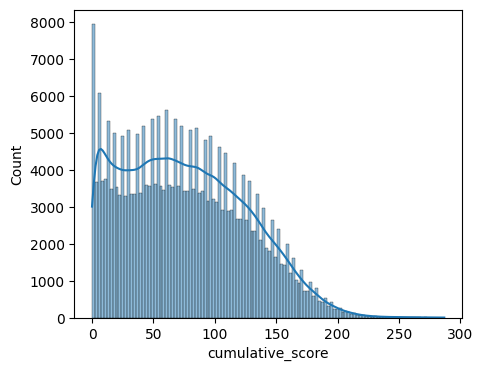

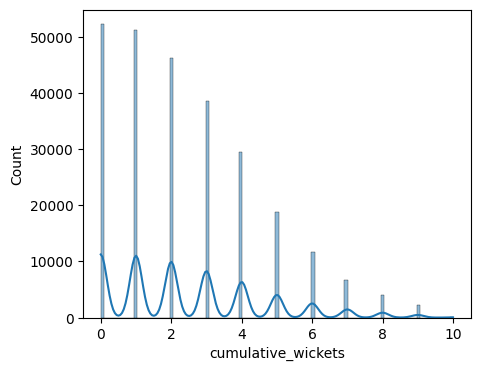

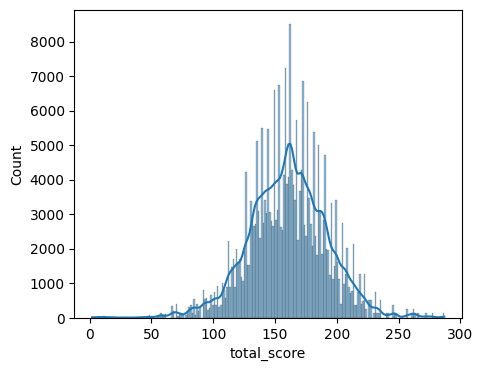

In [ ]:
#Univariate analysis
#histogram for all numerical columns

num_cols = main_data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(5, 4))
    sns.histplot(main_data[col], kde=True)

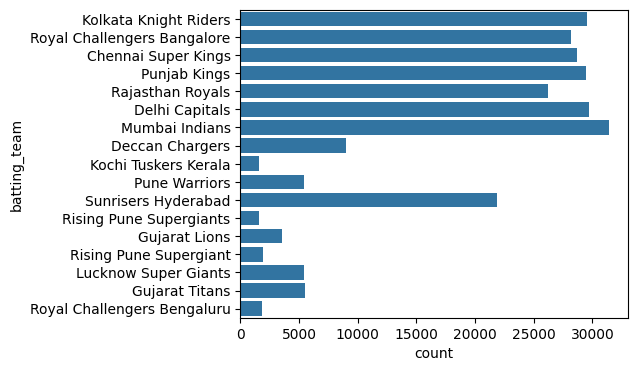

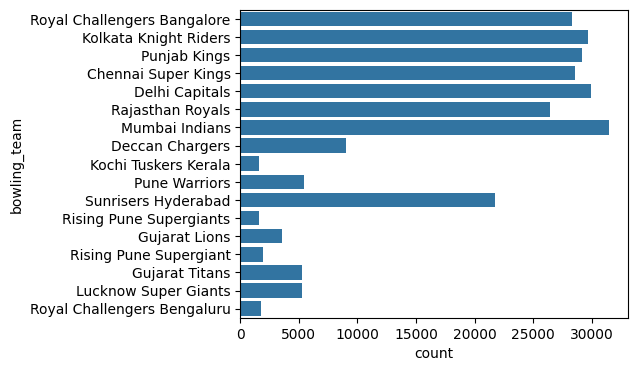

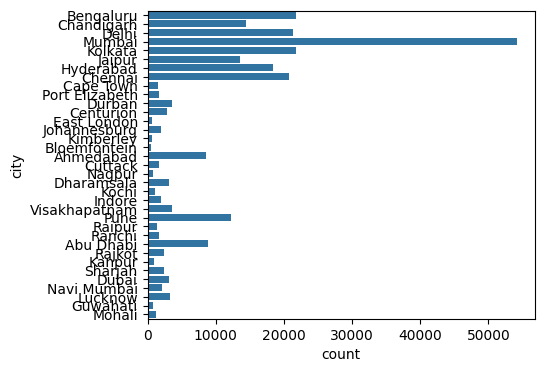

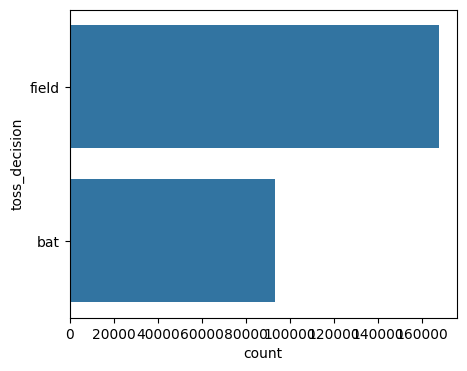

In [ ]:
#countplot for categorical columns

cat_cols = main_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(main_data[col])

<Axes: xlabel='total_score', ylabel='score_last_30_balls'>

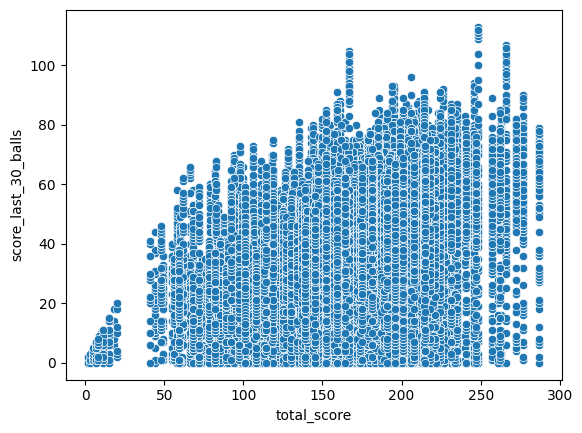

In [ ]:
##Bivariate analysis

sns.scatterplot(x='total_score', y='score_last_30_balls', data=main_data) # Pass 'total_score' and 'score_last_30_balls' as keyword arguments 'x' and 'y', respectively, and provide the DataFrame as 'data'

<Axes: xlabel='total_score', ylabel='wickets_last_30_balls'>

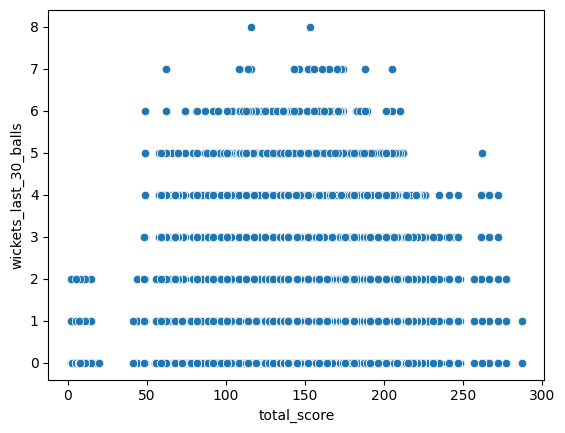

In [ ]:
sns.scatterplot(x='total_score', y='wickets_last_30_balls', data=main_data)

<Axes: xlabel='total_score', ylabel='cumulative_score'>

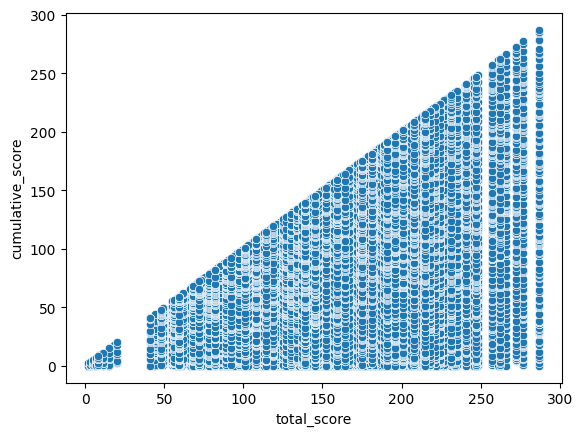

In [ ]:
sns.scatterplot(x='total_score', y='cumulative_score', data=main_data)

<Axes: xlabel='batting_team', ylabel='total_score'>

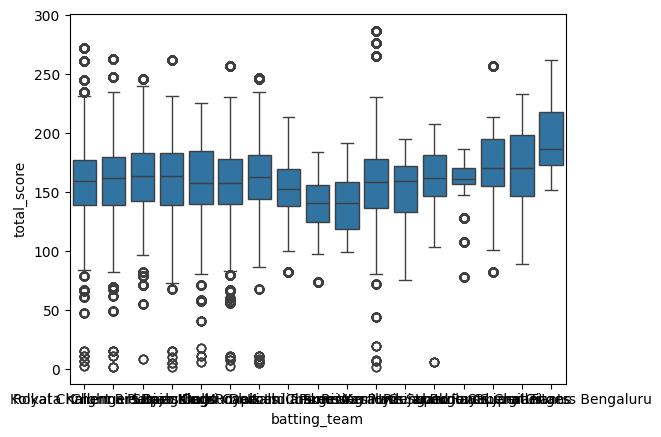

In [ ]:
sns.boxplot(x='batting_team', y='total_score', data=main_data)

<Axes: xlabel='toss_decision', ylabel='total_score'>

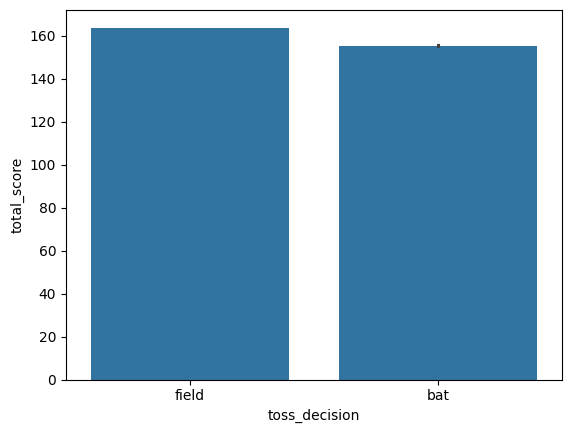

In [ ]:
##toss decision verses total score
sns.barplot(data=main_data,x='toss_decision',y='total_score')

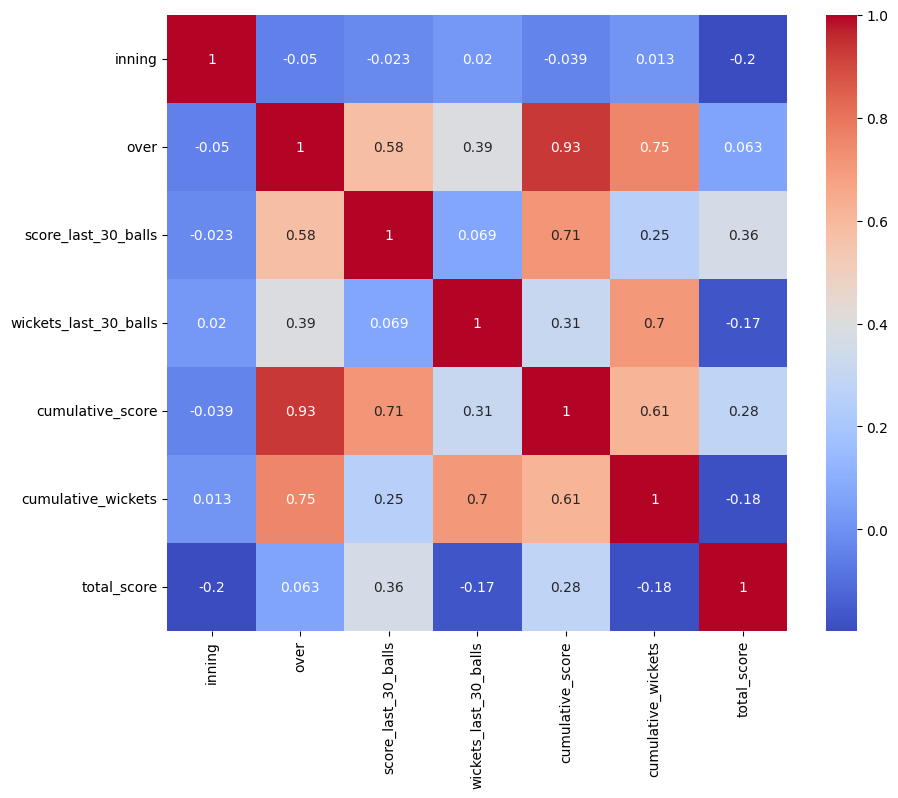

In [ ]:
num_col = main_data.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = main_data[num_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: ylabel='total_score'>

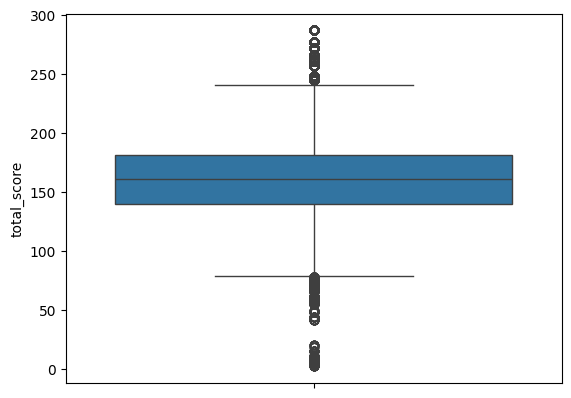

In [ ]:
## Outlier detection
import seaborn as sns

sns.boxplot(main_data['total_score'])

<Axes: ylabel='score_last_30_balls'>

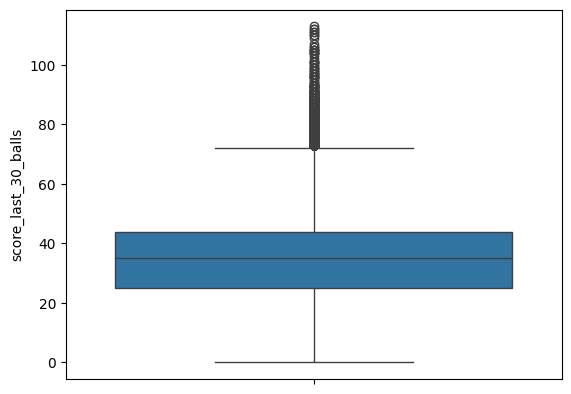

In [ ]:
sns.boxplot(main_data['score_last_30_balls'])

<Axes: ylabel='wickets_last_30_balls'>

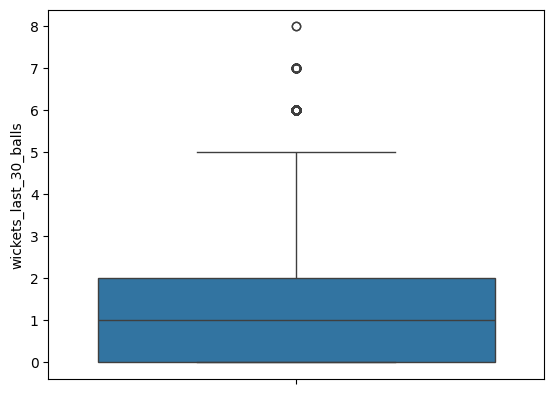

In [ ]:
sns.boxplot(main_data['wickets_last_30_balls'])

<Axes: ylabel='cumulative_score'>

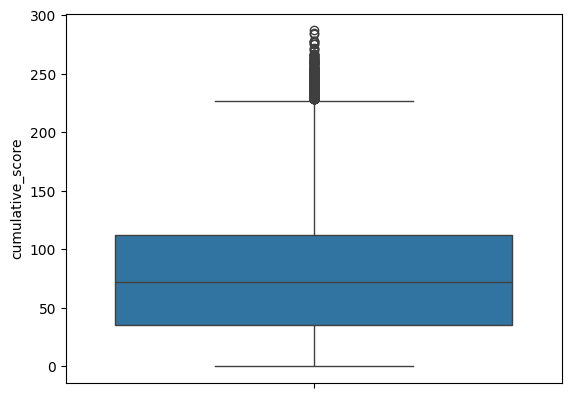

In [ ]:
sns.boxplot(main_data['cumulative_score'])

In [ ]:
# Feature Engineering
ipl_data=pd.get_dummies(main_data, columns=['batting_team','bowling_team','toss_decision','city'],dtype=int)

In [ ]:
# Rearranging the columns accordingly
ipl_data = ipl_data[['inning','date', 'batting_team_Chennai Super Kings', 'batting_team_Delhi Capitals',
       'batting_team_Gujarat Titans', 'batting_team_Kolkata Knight Riders',
       'batting_team_Lucknow Super Giants', 'batting_team_Mumbai Indians',
       'batting_team_Punjab Kings', 'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Gujarat Titans',
       'bowling_team_Kolkata Knight Riders',
       'bowling_team_Lucknow Super Giants', 'bowling_team_Mumbai Indians',
       'bowling_team_Punjab Kings', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad',  'toss_decision_bat',
       'toss_decision_field', 'city_Ahmedabad',
       'city_Bengaluru', 'city_Chandigarh', 'city_Chennai', 'city_Cuttack',
       'city_Delhi', 'city_Dharamsala', 'city_Guwahati', 'city_Hyderabad',
       'city_Indore', 'city_Jaipur', 'city_Kolkata', 'city_Lucknow',
       'city_Mohali', 'city_Mumbai', 'city_Navi Mumbai', 'city_Pune',
       'city_Raipur', 'city_Ranchi', 'city_Visakhapatnam','over',  'score_last_30_balls',
       'wickets_last_30_balls', 'cumulative_score','cumulative_wickets', 'total_score'
       ]]

In [ ]:
ipl_data

,inning,date,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Gujarat Titans,batting_team_Kolkata Knight Riders,batting_team_Lucknow Super Giants,batting_team_Mumbai Indians,batting_team_Punjab Kings,batting_team_Rajasthan Royals,...,city_Pune,city_Raipur,city_Ranchi,city_Visakhapatnam,over,score_last_30_balls,wickets_last_30_balls,cumulative_score,cumulative_wickets,total_score
0,1,2008-04-18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1.0,0.0,1,0,222
1,1,2008-04-18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1.0,0.0,1,0,222
2,1,2008-04-18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2.0,0.0,2,0,222
3,1,2008-04-18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2.0,0.0,2,0,222
4,1,2008-04-18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2.0,0.0,2,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,2,2024-05-26,0,0,0,1,0,0,0,0,...,0,0,0,0,9,58.0,1.0,110,2,114
260916,2,2024-05-26,0,0,0,1,0,0,0,0,...,0,0,0,0,9,59.0,1.0,111,2,114
260917,2,2024-05-26,0,0,0,1,0,0,0,0,...,0,0,0,0,10,56.0,1.0,112,2,114
260918,2,2024-05-26,0,0,0,1,0,0,0,0,...,0,0,0,0,10,53.0,1.0,113,2,114


In [ ]:
ipl_data.describe()

,inning,date,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Gujarat Titans,batting_team_Kolkata Knight Riders,batting_team_Lucknow Super Giants,batting_team_Mumbai Indians,batting_team_Punjab Kings,batting_team_Rajasthan Royals,...,city_Pune,city_Raipur,city_Ranchi,city_Visakhapatnam,over,score_last_30_balls,wickets_last_30_balls,cumulative_score,cumulative_wickets,total_score
count,260920.000000,260920,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,...,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,1.483531,2016-07-08 06:32:41.649547776,0.109808,0.113951,0.021056,0.113115,0.020696,0.120485,0.112981,0.100575,...,0.046907,0.005484,0.006404,0.013556,9.197677,34.038958,1.154158,76.214752,2.457171,160.579304
min,1.000000,2008-04-18 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,2012-04-22 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,25.000000,0.000000,35.000000,1.000000,140.000000
50%,1.000000,2016-05-06 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,35.000000,1.000000,72.000000,2.000000,161.000000
75%,2.000000,2021-04-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,44.000000,2.000000,112.000000,4.000000,181.000000
max,6.000000,2024-05-26 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,19.000000,113.000000,8.000000,287.000000,10.000000,287.000000
std,0.502643,NaN,0.312650,0.317752,0.143572,0.316734,0.142365,0.325529,0.316570,0.300766,...,0.211440,0.073854,0.079770,0.115638,5.683484,15.143271,1.081444,49.337120,2.097994,31.409947


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# numerical_cols = ['score_last_30_balls','over', 'wickets_last_30_balls', 'cumulative_score', 'cumulative_wickets']
# minmax_scaler = MinMaxScaler()
# ipl_data[numerical_cols] = minmax_scaler.fit_transform(ipl_data[numerical_cols])
# ipl_data

In [ ]:
#standard scaling
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#ipl_data[['cumulative_score', 'score_last_30_balls']] = scaler.fit_transform(ipl_data[['cumulative_score', 'score_last_30_balls']])

In [ ]:
ipl_data

,inning,date,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Gujarat Titans,batting_team_Kolkata Knight Riders,batting_team_Lucknow Super Giants,batting_team_Mumbai Indians,batting_team_Punjab Kings,batting_team_Rajasthan Royals,...,city_Pune,city_Raipur,city_Ranchi,city_Visakhapatnam,over,score_last_30_balls,wickets_last_30_balls,cumulative_score,cumulative_wickets,total_score
0,1,2008-04-18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1.0,0.0,1,0,222
1,1,2008-04-18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1.0,0.0,1,0,222
2,1,2008-04-18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2.0,0.0,2,0,222
3,1,2008-04-18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2.0,0.0,2,0,222
4,1,2008-04-18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2.0,0.0,2,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,2,2024-05-26,0,0,0,1,0,0,0,0,...,0,0,0,0,9,58.0,1.0,110,2,114
260916,2,2024-05-26,0,0,0,1,0,0,0,0,...,0,0,0,0,9,59.0,1.0,111,2,114
260917,2,2024-05-26,0,0,0,1,0,0,0,0,...,0,0,0,0,10,56.0,1.0,112,2,114
260918,2,2024-05-26,0,0,0,1,0,0,0,0,...,0,0,0,0,10,53.0,1.0,113,2,114


In [ ]:
# Download dataset
#ipl_data.to_csv('ipl_data.csv', index=False)
#from google.colab import files
#files.download('ipl_data.csv')

In [ ]:
# Splitting the data to train and test
# Splitting the data into train and test set
x_train = ipl_data.drop(labels='total_score', axis=1)[ipl_data['date'].dt.year <= 2022]
x_test = ipl_data.drop(labels='total_score', axis=1)[ipl_data['date'].dt.year > 2022]

In [ ]:
y_train = ipl_data[ipl_data['date'].dt.year <= 2022]['total_score'].values
y_test  = ipl_data[ipl_data['date'].dt.year > 2022]['total_score'].values

In [ ]:
# Removing the 'date' column
x_train.drop(labels='date', axis=True, inplace=True)
x_test.drop(labels='date', axis=True, inplace=True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor()
}

In [ ]:
results_mse = {}
results_mae = {}
results_r2 = {}

for name, model in models.items():
    # Cross-validation for MSE
    scores_mse = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
    results_mse[name] = -np.mean(scores_mse)  # Convert back to positive MSE

    # Cross-validation for MAE
    scores_mae = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=10)
    results_mae[name] = -np.mean(scores_mae)  # Convert back to positive MAE

    # Cross-validation for R-squared
    scores_r2 = cross_val_score(model, x_train, y_train, scoring='r2', cv=10)
    results_r2[name] = np.mean(scores_r2)

# Print the results for each metric
print("Mean Squared Error (MSE) across models:")
for name, score in results_mse.items():
    print(f"{name}: {score:.4f}")

print("\nMean Absolute Error (MAE) across models:")
for name, score in results_mae.items():
    print(f"{name}: {score:.4f}")

print("\nR-squared across models:")
for name, score in results_r2.items():
    print(f"{name}: {score:.4f}")

Mean Squared Error (MSE) across models:
LinearRegression: 523.1014
Lasso: 529.2640
Ridge: 523.0959
RandomForestRegressor: 676.1118
DecisionTreeRegressor: 1020.5572
GradientBoostingRegressor: 513.2131
XGBRegressor: 596.2176
AdaBoostRegressor: 653.7052

Mean Absolute Error (MAE) across models:
LinearRegression: 16.9663
Lasso: 16.9246
Ridge: 16.9662
RandomForestRegressor: 18.9388
DecisionTreeRegressor: 23.7436
GradientBoostingRegressor: 16.8723
XGBRegressor: 18.1876
AdaBoostRegressor: 19.8050

R-squared across models:
LinearRegression: 0.3976
Lasso: 0.3901
Ridge: 0.3976
RandomForestRegressor: 0.2194
DecisionTreeRegressor: -0.1860
GradientBoostingRegressor: 0.4091
XGBRegressor: 0.3120
AdaBoostRegressor: 0.2433


In [ ]:


# Identify the best model based on each metric (optional)
best_model = min(results_mse, key=results_mse.get)
print(f"\nBest model (based on MSE): {best_model_mse} with MSE {results_mse[best_model_mse]:.4f}")

best_model = min(results_mae, key=results_mae.get)
print(f"Best model (based on MAE): {best_model_mae} with MAE {results_mae[best_model_mae]:.4f}")

best_model= max(results_r2, key=results_r2.get)
print(f"Best model (based on R-squared): {best_model_r2} with R-squared {results_r2[best_model_r2]:.4f}")


Best model (based on MSE): GradientBoostingRegressor with MSE 513.2131
Best model (based on MAE): GradientBoostingRegressor with MAE 16.8723
Best model (based on R-squared): GradientBoostingRegressor with R-squared 0.4091


In [ ]:
#regression using gradientboostregressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
x=ipl_data.drop(labels='total_score', axis=1)
y=ipl_data['total_score']

In [ ]:
x.columns

Index(['inning', 'date', 'batting_team_Chennai Super Kings',
       'batting_team_Delhi Capitals', 'batting_team_Gujarat Titans',
       'batting_team_Kolkata Knight Riders',
       'batting_team_Lucknow Super Giants', 'batting_team_Mumbai Indians',
       'batting_team_Punjab Kings', 'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Gujarat Titans',
       'bowling_team_Kolkata Knight Riders',
       'bowling_team_Lucknow Super Giants', 'bowling_team_Mumbai Indians',
       'bowling_team_Punjab Kings', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad', 'toss_decision_bat',
       'toss_decision_field', 'city_Ahmedabad', 'city_Bengaluru',
       'city_Chandigarh', 'city_Chennai', 'city_Cuttack', 'city_Delhi',
       'city_Dharamsala', 'city_Guwahati

In [ ]:
x.drop(labels='date', axis=True, inplace=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data loaded into a pandas DataFrame called 'df'
# and your target variable is in a column named 'target'
# and your features are in the remaining columns

# Split the data into training and testing sets
# test_size=0.2 indicates that 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
# You can adjust hyperparameters like n_estimators, learning_rate, max_depth, etc.
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gbr.fit(x_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(x_test)

In [ ]:
y_pred

array([191.72710318, 133.76435402, 174.11860678, ..., 135.92676569,
       145.4660846 , 150.62634261])

In [ ]:
#remove decimal from y_pred
import numpy as np
y_pred = np.round(y_pred)
y_pred

array([192., 134., 174., ..., 136., 145., 151.])

In [ ]:
y_test

,total_score
84890,194
9843,153
214974,169
11025,112
76680,156
...,...
215384,181
86178,164
62084,137
86115,164


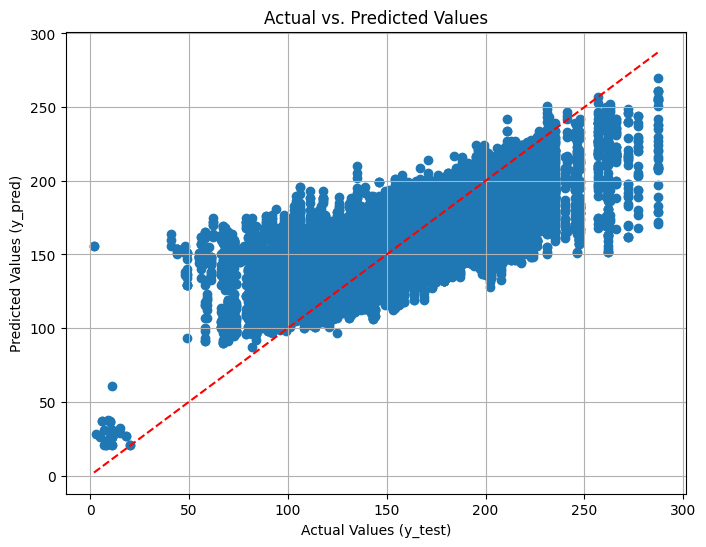

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Diagonal line for perfect prediction
plt.grid(True)
plt.show()

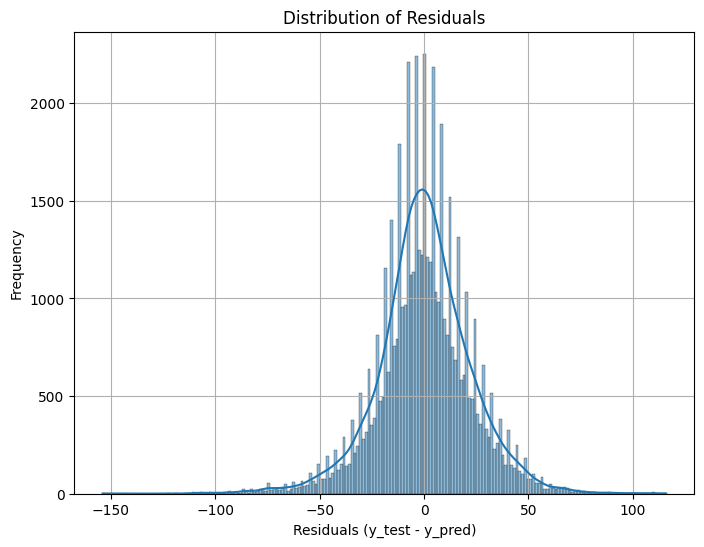

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (y_test - y_pred)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Retrieve the best model and train it on the entire training dataset
final_model = models[best_model]
final_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
# Save the model to a file using pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)


In [ ]:
x_train.columns

Index(['inning', 'batting_team_Chennai Super Kings',
       'batting_team_Delhi Capitals', 'batting_team_Gujarat Titans',
       'batting_team_Kolkata Knight Riders',
       'batting_team_Lucknow Super Giants', 'batting_team_Mumbai Indians',
       'batting_team_Punjab Kings', 'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Gujarat Titans',
       'bowling_team_Kolkata Knight Riders',
       'bowling_team_Lucknow Super Giants', 'bowling_team_Mumbai Indians',
       'bowling_team_Punjab Kings', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad', 'toss_decision_bat',
       'toss_decision_field', 'city_Ahmedabad', 'city_Bengaluru',
       'city_Chandigarh', 'city_Chennai', 'city_Cuttack', 'city_Delhi',
       'city_Dharamsala', 'city_Guwahati', 'city